# Histogrammen
Deze grafieken laten de verdeling van de stemmen zien in groepjes. 

Om de grafieken te kunnen saven moet je zowel `selenium` als `chromedriver` hebben geinstalleerd. Zie [https://altair-viz.github.io/user_guide/saving_charts.html](hier) voor meer informatie.

In [1]:
DATA_PATH = "../3-pipeline/ps2019-kiesraad-with-locations.csv"
OUT_CHART_PATH = "../4-output/histograms/histogram-%s.png"
TMP_DATA_PATH = "../3-pipeline/tmp/histogram-%s.json"

from dataknead import Knead
from IPython.display import display
import altair as alt
import pandas as pd

# We should fix this later
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

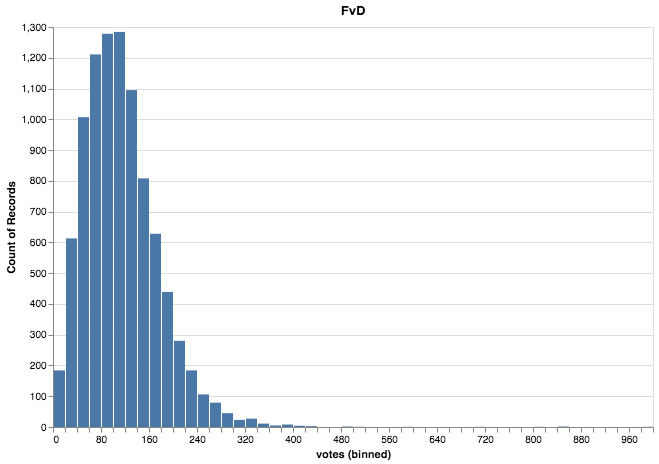

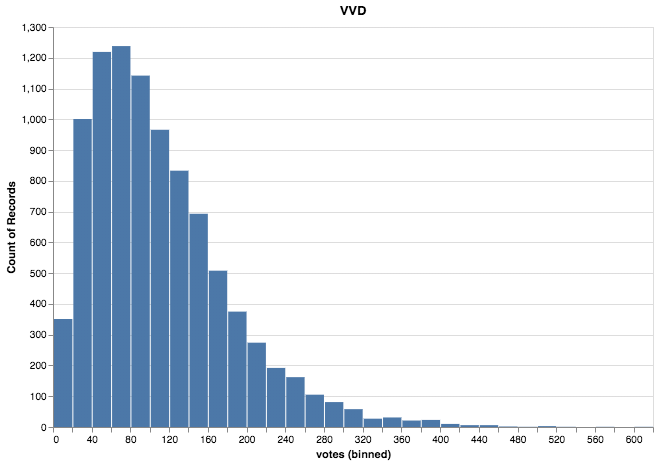

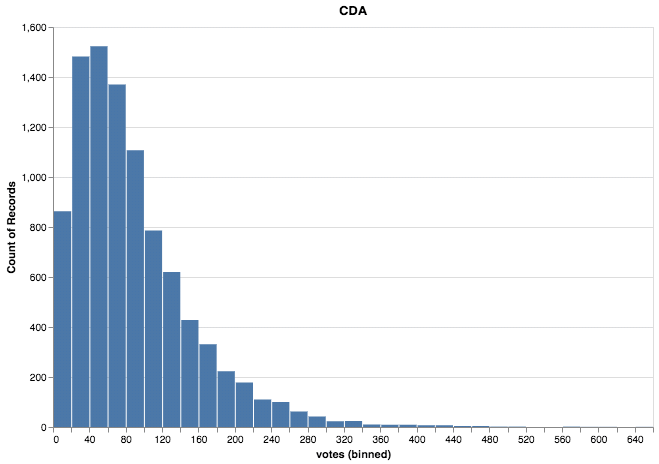

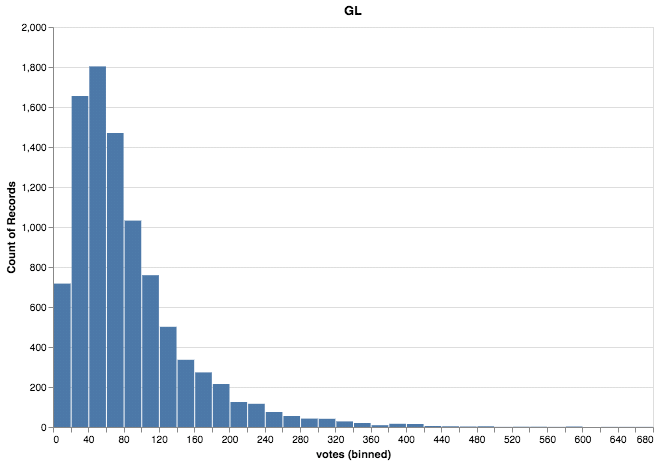

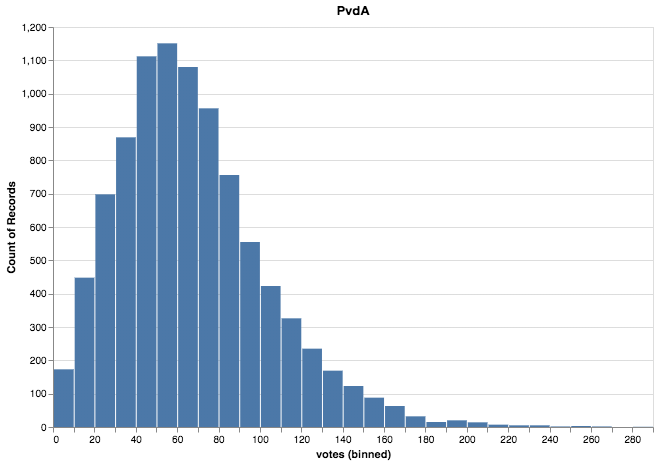

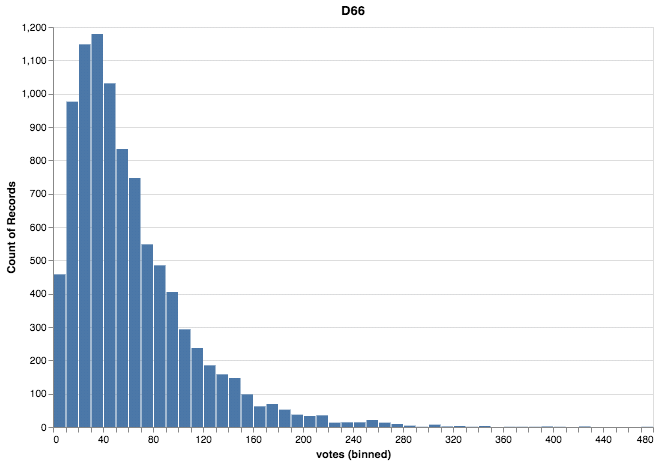

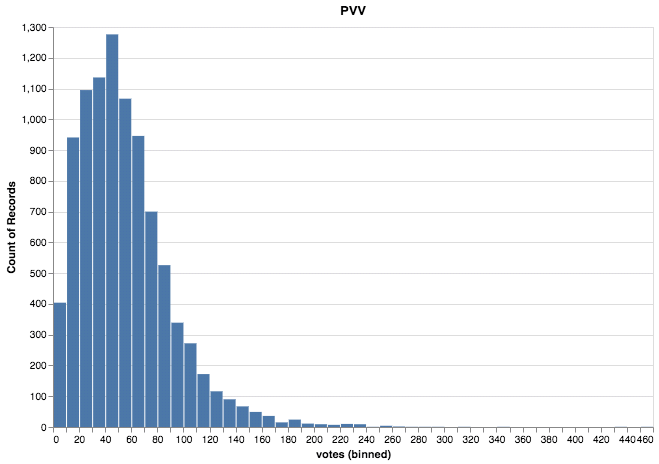

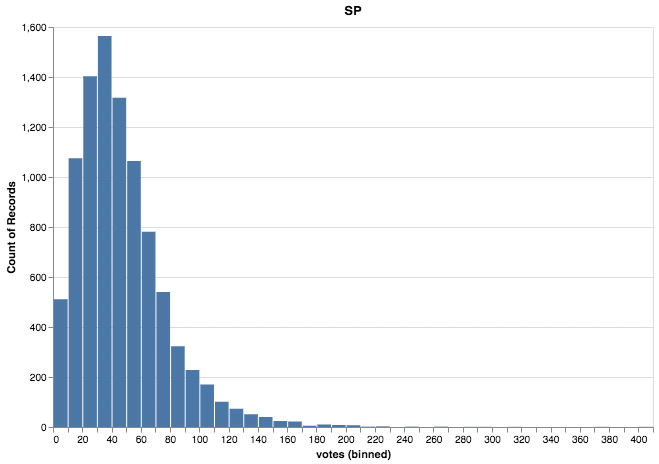

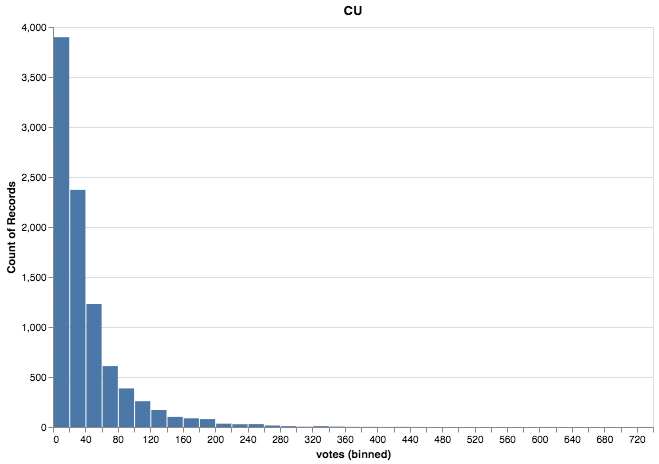

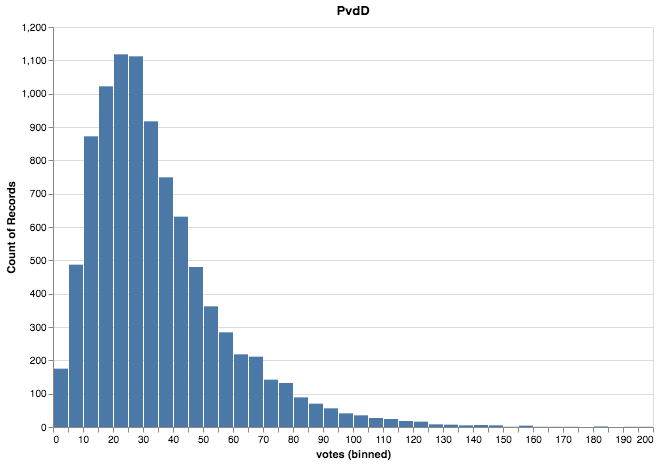

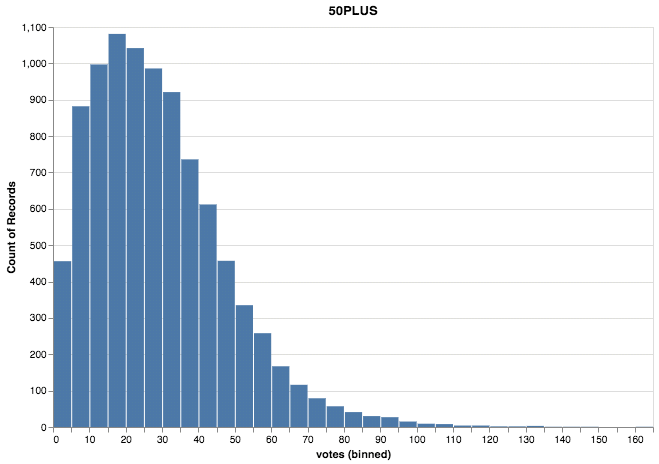

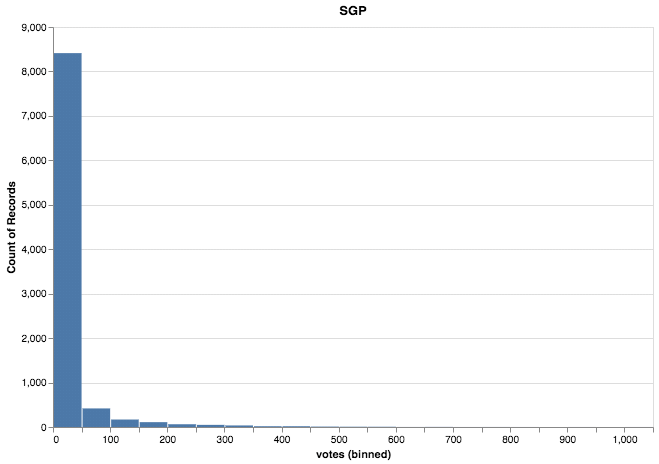

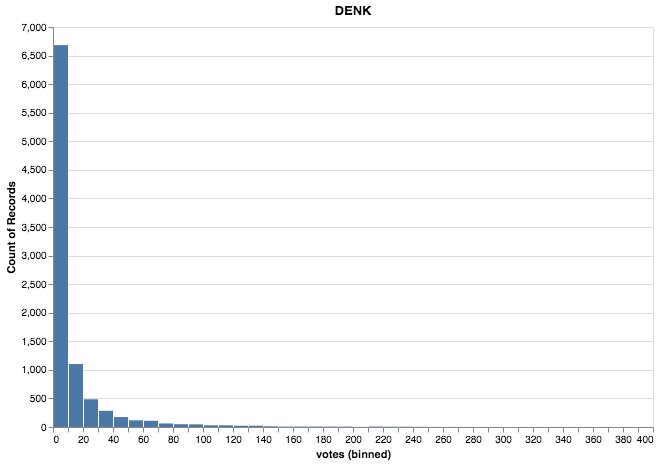

In [2]:
df = pd.read_csv(DATA_PATH)

for party in df["party"].unique():
    votes = df[df["party"] == party]
    
    # To avoid giant notebooks, we save the data to a file before including it
    url = TMP_DATA_PATH % party
    votes.to_json(url, orient = "records")

    chart = alt.Chart(url, width = 600, height = 400, title = party).mark_bar(clip = True).encode(
        alt.X(
            "votes:Q", 
            bin = alt.Bin(maxbins = 50),
        ),
        y = "count()"
    )
    
    display(chart)